# 🔬 Análise de vendas de um E-commerce na Black Friday
---

In [1]:
# Preparando a caixa de ferramentas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Lendo o Dataset exportado do notebook "questions-ecommerce"
df = pd.read_csv('data/dataframe_final.csv')
df['Product_Category_1'] = df['Product_Category_1'].astype('Int64')
df['Product_Category_2'] = df['Product_Category_2'].astype('Int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('Int64')

## 🔍 Questão 12
O estado civil influencia no valor gasto e na categoria de produto comprada? Mostre!

Se eu quisesse vender mais produtos da categoria 14, deveria investir em propagandas para qual estado civil?

### Influência de estado civil no valor gasto

#### 1. Estudo das variáveis: "Purchase" e "Marital Status"

A variável "Purchase" é do tipo numérica (quantitativa) contínua. Representa o valor gasto em cada compra realizada.

A variável "Marital Status" é do tipo categórica nominal, representada de forma binária: "0" representa um estado civil e "1" representa outro.

#### 2. Estudo do método de análise.

Para esse caso (variável categórica x variável numérica), há dois caminhos:

1. Pode-se usar o Teste-T Independente para concluir estatísticamente se o estado civil exerce influência sobre o valor da compra.
2. Pode-se analisar a correlação das variáveis visualmente com gráficos e tabelas de comparação.

Para usar o Teste-T Independente, a variável numérica deve ter distribuição normal. Podemos observar sua distribuição com um gráfico de histograma.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

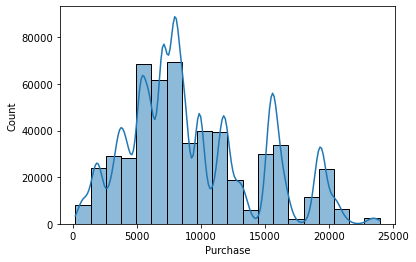

In [3]:
sns.histplot(df['Purchase'], bins=20, kde=True)

A normalidade da distribuição não é clara. 

Para chegar a uma conclusão robusta, testes de normalidade (Shapiro-Wilk, D'Agostino K^2 e Anderson Darling), análise outliers e manipulação dos dados de "Purchase" seriam necessários.

#### 3. Análise da correlação entre as variáveis.

Observando a correlação com o uso do gráfico de Box Plot do Estado Civil x Valor e uma tabela de *group_by*.

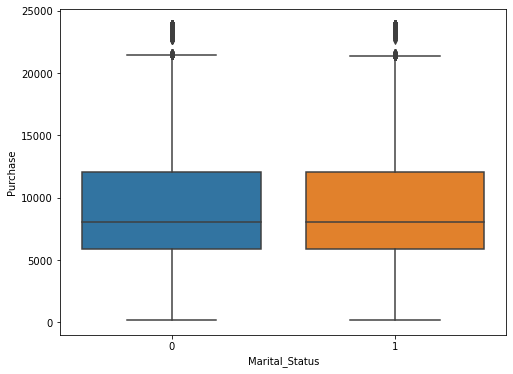

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Marital_Status', y='Purchase', data=df)

In [5]:
print('Média do valor da compra agrupada por estado civil:')
df[['Marital_Status', 'Purchase']].groupby(['Marital_Status'], as_index=False).mean()

Média do valor da compra agrupada por estado civil:


,Marital_Status,Purchase
0,0,9333.325467
1,1,9334.632681


#### 4. Conclusão da correlação.

O gráfico de Box Plot dos dois tipos de estado civil (0 e 1) são bastante similares - assim como a média apresentada na tabela. Não encontramos correlação significativa entre o estado civil e o valor gasto na compra.

### Influência de estado civil na categoria comprada

#### 1. Estudo das variáveis: "Marital_Status" e ("Product_Category_1", "Product_Category_2", "Product_Category_3")

A variável "Marital Status" é do tipo categórica nominal, representada de forma binária: "0" representa um estado civil e "1" representa outro.

As variáveis "Product_Category_X", apesar de serem representadas como inteiros, também são categóricas nominais.

#### 2. Estudo do método de análise.

Nesse caso (variável categórica x variável categórica), podemos comparar o comportamento dos dois diferentes estados civis em relação às categorias de produto com gráficos de coluna e tabelas de dados categorizados.

#### 3. Análise da correlação entre as variáveis.

O primeiro desafio com o qual nos deparamos na escolha do método de análise: o dado a ser observado (contagem de cada categoria) está dividido em 3 colunas. Para isso, usamos o **pd.melted** e o **pd.crosstrab** para reunir as informações de forma a mostrar o **total** da soma de cada categoria para os dois estados civis possíves.

Além disso, é necessário normalizar os dados em relação à própria categoria - já que há um volume diferente de compras paracada estado civil.

In [6]:
# Criando um DataFrame somente com as categorias de produto
df_categories = df[['Marital_Status','Product_Category_1', 'Product_Category_2', 'Product_Category_3']]

# 'Melting' o DataFrame e renomeando as colunas para visualização
df_melted_categories = df_categories.melt(id_vars = 'Marital_Status')
df_melted_categories.rename({'value': 'Product_Category',
                             'variable': 'Variable'},
                            axis=1, 
                            inplace=True)

# Criando um Crosstab para a visualização dos dados
df_crosstab = pd.crosstab(index=df_melted_categories['Marital_Status'], 
                          columns=df_melted_categories['Product_Category'],
                          normalize='index') # Normalizando o Crosstab por estado civil

# Multiplicando os valores por 100 (para mostrar em porcentagem)
df_crosstab = df_crosstab * 100

Assim, podemos observar a porcentagem que cada estado civil comprou de cada tipo de produto e comparar o comportamento nos dois casos.

***Nota:*** *o Dataset apresenta o registro de 537.577 compras. Cada compra contém um produto que pode fazer parte de 1-3 categorias. Os dados foram normalizados (em 100%) para esse contexto específico: em relação ao total da contagem de valores das categorias.* 

In [7]:
df_crosstab.round(2)

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Marital_Status,,,,,,,,,,,,,,,,,,
0,13.08,6.82,2.25,3.74,17.95,3.88,0.37,17.06,1.68,0.83,3.78,1.66,1.92,6.8,6.62,7.94,2.71,0.91
1,12.64,6.55,2.06,3.40,17.57,3.79,0.44,18.12,1.54,1.01,3.58,1.79,2.06,7.0,6.65,7.78,2.96,1.05


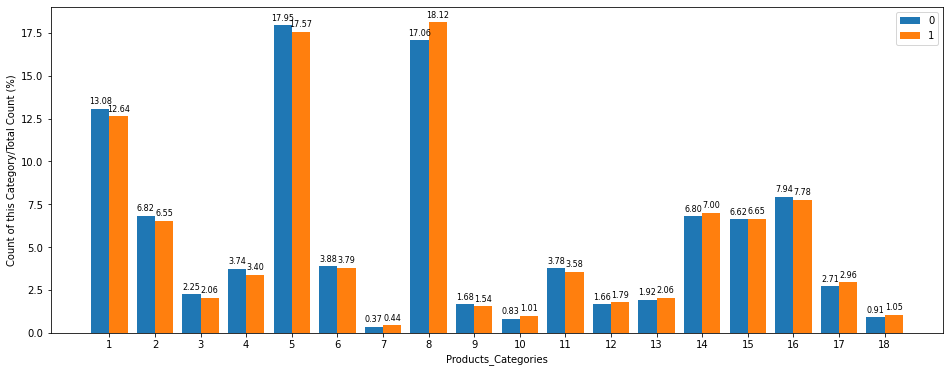

In [8]:
X = list(df_crosstab.columns)
Y0 = list(df_crosstab.iloc[0].values)
Y1 = list(df_crosstab.iloc[1].values)  
X_axis = np.arange(len(X))

fig, ax = plt.subplots(figsize=(16,6))

rects1 = ax.bar(X_axis - 0.2, Y0, 0.4, label = '0')
rects2 = ax.bar(X_axis + 0.2, Y1, 0.4, label = '1')

for chart in (rects1, rects2):
    for rect in chart:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), fontsize=8,
                    textcoords="offset points",
                    ha='center', va='bottom')
        
ax.set_xticks(X_axis)
ax.set_xticklabels(X)
ax.set_xlabel("Products_Categories")
ax.set_ylabel("Count of this Category/Total Count (%)")
ax.legend()

#### 4. Conclusão da correlação.

Notamos diferenças entre os dois estados civis. Porém, o padrão ainda é bastante aproximado. 

- As categorias 1, 5 e 8 representam 48% dos produtos para ambos estados civis.
- A maior diferença absoluta está na categoria 8: 1,06 p.p.
- A maior diferença relativa está na categoria 10: 22% (1,01% para o estado civil "1" e 0,83% para o estado civil "0."

Para chegar a uma conclusão mais robusta, um teste estatístico (como o Chi-Square) poderia ser usado.

### Público-alvo de propagandas para a categoria 14

Se eu quisesse vender mais produtos da categoria 14, deveria investir em propagandas para qual estado civil?

Para responder essa pergunta, podemos aproveitar o que foi construído nas análises anteriores. Podemos observaro comportamento dos estados civis nas compras dos produtos das categoria 14.

In [9]:
# Criando um filtro que seleciona os registros que sejam da categoria 14 em qualquer uma das colunas
filtro_categoria14 = ((df['Product_Category_1'] == 14) |
                      (df['Product_Category_2'] == 14) |
                      (df['Product_Category_3'] == 14))

print('Número de compras de produtos que se encaixam na categoria 14:')
print(pd.crosstab(index=df_melted_categories['Marital_Status'], 
            columns=df_melted_categories['Product_Category'])[14])

print('Valor gasto nas compras de produtos que se encaixam na categoria 14:')
print(df[filtro_categoria14].groupby(by='Marital_Status')['Purchase'].sum())

Número de compras de produtos que se encaixam na categoria 14:
Marital_Status
0    43271
1    30508
Name: 14, dtype: int64
Valor gasto nas compras de produtos que se encaixam na categoria 14:
Marital_Status
0    343916804
1    242855346
Name: Purchase, dtype: int64


In [10]:
print('Número de compras em geral:')
print(df.groupby(by='Marital_Status')['Purchase'].count())

print('Valor gasto nas compras em geral:')
print(df.groupby(by='Marital_Status')['Purchase'].sum())

Número de compras em geral:
Marital_Status
0    317817
1    219760
Name: Purchase, dtype: int64
Valor gasto nas compras em geral:
Marital_Status
0    2966289500
1    2051378878
Name: Purchase, dtype: int64


#### Considerações

**Estado civil "0":**
- Fez 317.817 compras:
    - Dessas compras, 43.271 tinham produtos que podem ser considerados da categoria 14 (na categoria 1, 2 ou 3).
    - Isso representa 13,6% das compras dessa categoria.
- Gastou R\$ 2.966.289.500,00:
    - Desse valor, R\$ 343.916.804,00 foi gasto com produtos que se encaixam na categoria 14.
    - Isso representa 11,59% do valor gasto por esse grupo.
    
    
**Estado civil "1":**
- Fez 219.760 compras
    - Dessas compras, 30.508 tinham produtos que podem ser considerados da categoria 14 (na categoria 1, 2 ou 3).
    - Isso representa 13,9% do total das compras dessa categoria.
- Gastou R\$ 2.051.378.878,00:
    - Desse valor, R\$ 242.855.346,00 foi gasto com produtos que se encaixam na categoria 14.
    - Isso representa 11,83% do valor gasto por esse grupo.
    
#### Comportamento para os produtos mais vendidos

Olhando a correlação dos 50 produtos mais vendidos com o estado civil:

Text(0, 0.5, 'Soma do valor das compras')

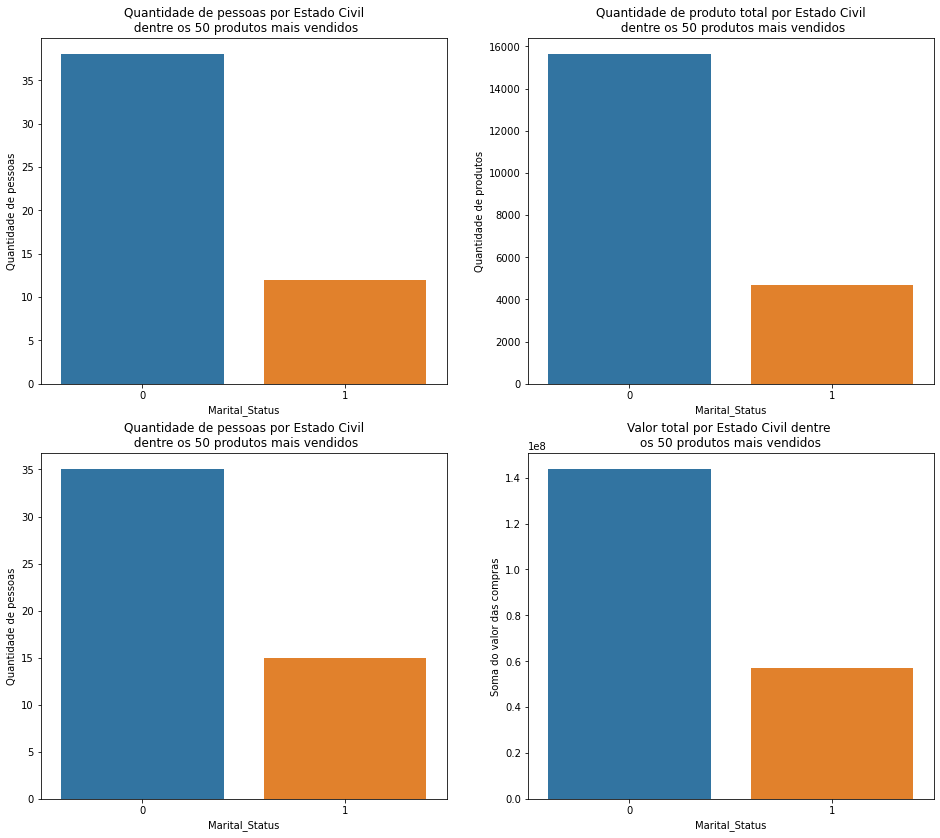

In [11]:
produtos_mais_vendidos = df[filtro_categoria14].groupby(['Product_ID','Marital_Status'])['Product_ID'].count()
produtos_mais_vendidos1 = pd.DataFrame(produtos_mais_vendidos.sort_values(ascending=False).head(50))
preco = df[filtro_categoria14].groupby(['Product_ID','Marital_Status'])['Purchase'].sum()
preco1 = pd.DataFrame(preco.sort_values(ascending=False).head(50))

tabela1 = produtos_mais_vendidos1.groupby('Marital_Status').count()
tabela2 = produtos_mais_vendidos1.groupby('Marital_Status').sum()
tabela3 = preco1.groupby('Marital_Status').count()
tabela4 = preco1.groupby('Marital_Status').sum()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,14))

sns.barplot(ax=ax1, x=tabela1.index, y='Product_ID', data=tabela1)
ax1.set_title('Quantidade de pessoas por Estado Civil\n dentre os 50 produtos mais vendidos')
ax1.set_ylabel('Quantidade de pessoas')

sns.barplot(ax=ax2, x=tabela2.index, y='Product_ID', data=tabela2)
ax2.set_title('Quantidade de produto total por Estado Civil\n dentre os 50 produtos mais vendidos')
ax2.set_ylabel('Quantidade de produtos')

sns.barplot(ax=ax3, x=tabela3.index, y='Purchase', data=tabela3)
ax3.set_title('Quantidade de pessoas por Estado Civil\n dentre os 50 produtos mais vendidos')
ax3.set_ylabel('Quantidade de pessoas')

sns.barplot(ax=ax4, x=tabela4.index, y='Purchase', data=tabela4)
ax4.set_title('Valor total por Estado Civil dentre \nos 50 produtos mais vendidos')
ax4.set_ylabel('Soma do valor das compras')

#### Consideração

E estado civil "0" é mais presente e se destaca tanto em volume quanto em valores de venda.

#### Resposta

Para o caso dos produtos mais vendidos, as propagandas podem ser direcionadas: 

- Para o fechamento de venda com o estado civil "0", já que esse grupo é mais propício a comprar esses produtos.
- Para o divulgação do produto com o estado civil "1", que é menos presente nesse nicho.

No geral, nenhum dos grupos apresentou uma característica que o colocasse como uma indicação clara de público-alvo para produtos da categoria 14. 

Para a tomada de decisão, pode-se considerar que o grupo do estado civil "0" fez mais compras e gastou mais no geral. Porém, a porcentagem de gastos do estado civil "1" foi levemente superior.

Mais questionamentos podem ser considerados para levar a uma decisão final: 
- Qual % do market-share o E-commerce possui de cada um dos mercados?
- Quanto custa o clique e atração de cada grupo?
- Quais são as % conversão de cada grupo no funil de vendas?
- Como é a retenção de cada grupo?

## 🔍 Questão 13
Quais as variáveis que mais impactaram no valor da compra? Como você chegou a essa conclusão?

#### 1. Estudo das variáveis:

Variáveis desconsideradas:
- "Marital_Status": analisada na questão 12.

As demais variáveis serão consideradas categóricas nominais ("Age" e "Stay_In_Current_City_Years" também podem ser vistas como ordinais).

As variáveis ID ("User_ID e "Product_ID") apresentam a particularidade de serem o registro individual do objeto, mostrando seu comportamento específico (não agrupam dados entre si).

#### 2. Estudo do método de análise.

Repetimos o estudo da questão anteior para variáveis categóricas nominais x variáveis numéricas: observação visual da relação entre as variáveis.

A análise das variáveis ID usará agrupamentos para observação.

#### 3. Análise da correlação entre as variáveis.

Observando a correlação com o uso do gráfico de Box Plot:

Text(0.5, 1.0, 'Tipo de Produto x Valor de Compra')

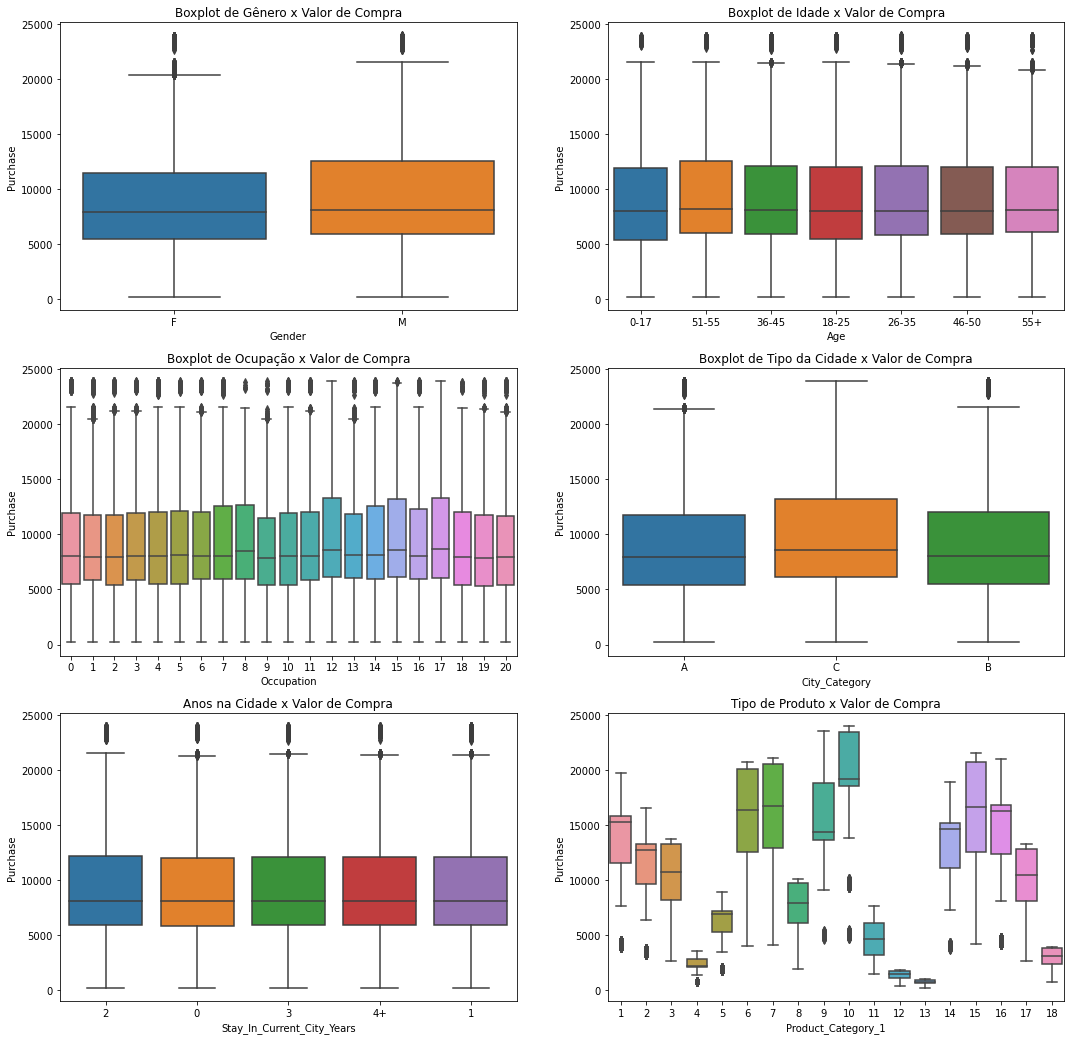

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(18,18))

# Variável "Gender"
sns.boxplot(ax=ax1, x='Gender', y='Purchase', data=df)
ax1.set_title('Boxplot de Gênero x Valor de Compra')

# Variável "Age"
sns.boxplot(ax=ax2, x='Age', y='Purchase', data=df)
ax2.set_title('Boxplot de Idade x Valor de Compra')

# Variável "Occupation"
sns.boxplot(ax=ax3, x='Occupation', y='Purchase', data=df)
ax3.set_title('Boxplot de Ocupação x Valor de Compra')

# Variável "City_Category"
sns.boxplot(ax=ax4, x='City_Category', y='Purchase', data=df)
ax4.set_title('Boxplot de Tipo da Cidade x Valor de Compra')

# Variável "Stay_In_Current_City_Years"
sns.boxplot(ax=ax5, x='Stay_In_Current_City_Years', y='Purchase', data=df)
ax5.set_title('Anos na Cidade x Valor de Compra')

# Variável "Product_Category_1"
sns.boxplot(ax=ax6, x='Product_Category_1', y='Purchase', data=df)
ax6.set_title('Tipo de Produto x Valor de Compra')

Observando o comportamento das variáveis ID:

In [13]:
# Agrupando o  User_ID em relação ao Purchase e vendo os dados estatisticos
df_user = df.groupby(by=['User_ID'])['Purchase'].describe()

# Calculando a amplitude (diferença da média do valor de compra de geral e do usuário)
df_user['amplitude'] = df_user['mean'].mean() - df_user['mean']

# Usando o módulo do valor
df_user['amplitude'] = df_user['amplitude'].abs()

In [14]:
df_user

,count,mean,std,min,25%,50%,75%,max,amplitude
User_ID,,,,,,,,,
1000001,34.0,9808.264706,4437.481236,1057.0,7901.00,9974.5,12573.75,19219.0,59.185897
1000002,76.0,10662.539474,4157.968816,3443.0,7821.00,9929.5,12017.25,20657.0,913.460665
1000003,29.0,11780.517241,5358.428805,3646.0,6953.00,12103.0,15592.00,19631.0,2031.438433
1000004,13.0,15845.153846,4265.866204,3849.0,15499.00,15853.0,19120.00,19693.0,6096.075038
1000005,106.0,7745.292453,4110.717354,1938.0,4551.75,6168.0,8823.00,21021.0,2003.786356
...,...,...,...,...,...,...,...,...,...
1006036,476.0,8028.710084,4362.083553,370.0,5313.75,7504.0,9743.25,23525.0,1720.368725
1006037,116.0,9267.560345,4558.172707,579.0,5974.00,8063.5,12062.00,23714.0,481.518464
1006038,10.0,8085.900000,3136.162498,5184.0,5978.25,6895.5,9225.75,13565.0,1663.178809


In [15]:
# Agrupando o  Product_ID em relação ao Purchase e vendo os dados estatísticos
df_produto = df.groupby(by=['Product_ID'])['Purchase'].describe()

# Calculando a amplitude (diferença dos valore máximos e mínimos do produto)
df_produto['amplitude'] = df_produto['max'] - df_produto['min']

df_produto

,count,mean,std,min,25%,50%,75%,max,amplitude
Product_ID,,,,,,,,,
P00000142,1130.0,11143.507080,2307.942795,2725.0,10591.25,10925.5,13380.00,13716.0,10991.0
P00000242,371.0,10552.293801,3179.231273,3214.0,9585.00,10023.0,13025.00,16503.0,13289.0
P00000342,238.0,5299.928571,1834.617830,1727.0,3692.25,5286.5,6928.00,8896.0,7169.0
P00000442,92.0,4795.358696,1664.088125,1764.0,3599.75,5194.0,5394.75,8891.0,7127.0
P00000542,146.0,5419.308219,1742.058891,1730.0,3748.50,5375.0,6966.25,8903.0,7173.0
...,...,...,...,...,...,...,...,...,...
P0099442,196.0,14353.642857,3716.564096,4093.0,12189.00,16007.5,16411.75,20684.0,16591.0
P0099642,13.0,6439.230769,2108.412442,3903.0,4222.00,5972.0,7862.00,10056.0,6153.0
P0099742,123.0,7862.373984,2936.961342,2670.0,5589.00,8185.0,10632.50,13661.0,10991.0


In [16]:
df_produto['amplitude'].max()

19334.0

#### 4. Conclusão das correlações.

**Variáveis ID**

- Um mesmo produto pode ser vendido por valores muito diferentes. Chegando a R\$ 19.334,00 de diferença entre si(!). Pode-se usar estratégias de venda diferentes para os usuários que compraram o produto nos valores mais altos e mais baixos.
- Há muita variância entre os valores de compra dos usuários.

**Variáveis Categóricas Nominais**

Não apresentaram correlação signficativa:
- Stay_In_Current_City_Years.

Apresentaram correlação baixa:
- Gender: o sexo masculino apresentou um valor mais elevado.
- Idade: apresenta leve relação de crescimento do valor médio com a idade. Categoria 51-55 anos apresentou o maior ticket médio.
- Occupation: "12", "15" e "17" tem o valor superior e "9" e "10" abaixo da maioria.
- City_Category: "C" apresentou um valor levemente superior às demais.

Apresentou correlação significativa:
- Product_Category_1: a categoria do produto teve bastante impacto quanto ao valor da compra. A categoria "10" tem o maior valor e a categoria "13", o menor.